LAST UPDATED ON 2023/04/21

1. aims at understanding how to extract images and corresponding labels

# Import libraries

In [14]:
import os
import cv2
import random
import numpy as np


from visualise import *
from bs4 import BeautifulSoup
from matplotlib import pyplot as plt

# Get images and labels path

In [15]:
ROOT = 'cat_and_dog_det_data'

img_path = os.listdir(os.path.join(ROOT, 'images'))
lab_path = os.listdir(os.path.join(ROOT, 'annotations'))

img_path = [os.path.join(ROOT, 'images', file) for file in img_path if file.split('.')[-1] == 'png']
lab_path = [os.path.join(ROOT, 'annotations', file) for file in lab_path if file.split('.')[-1] == 'xml']

img_path, lab_path = sorted(img_path), sorted(lab_path)

In [16]:
for i, (img, lab) in enumerate(zip(img_path, lab_path)):
    print(f'{i}: ', 'img_path: ', img, 'lab_path:', lab)
    
    if i == 10:
        break

0:  img_path:  cat_and_dog_det_data/images/Cats_Test0.png lab_path: cat_and_dog_det_data/annotations/Cats_Test0.xml
1:  img_path:  cat_and_dog_det_data/images/Cats_Test1.png lab_path: cat_and_dog_det_data/annotations/Cats_Test1.xml
2:  img_path:  cat_and_dog_det_data/images/Cats_Test10.png lab_path: cat_and_dog_det_data/annotations/Cats_Test10.xml
3:  img_path:  cat_and_dog_det_data/images/Cats_Test100.png lab_path: cat_and_dog_det_data/annotations/Cats_Test100.xml
4:  img_path:  cat_and_dog_det_data/images/Cats_Test1000.png lab_path: cat_and_dog_det_data/annotations/Cats_Test1000.xml
5:  img_path:  cat_and_dog_det_data/images/Cats_Test1001.png lab_path: cat_and_dog_det_data/annotations/Cats_Test1001.xml
6:  img_path:  cat_and_dog_det_data/images/Cats_Test1002.png lab_path: cat_and_dog_det_data/annotations/Cats_Test1002.xml
7:  img_path:  cat_and_dog_det_data/images/Cats_Test1003.png lab_path: cat_and_dog_det_data/annotations/Cats_Test1003.xml
8:  img_path:  cat_and_dog_det_data/images

# Plot images

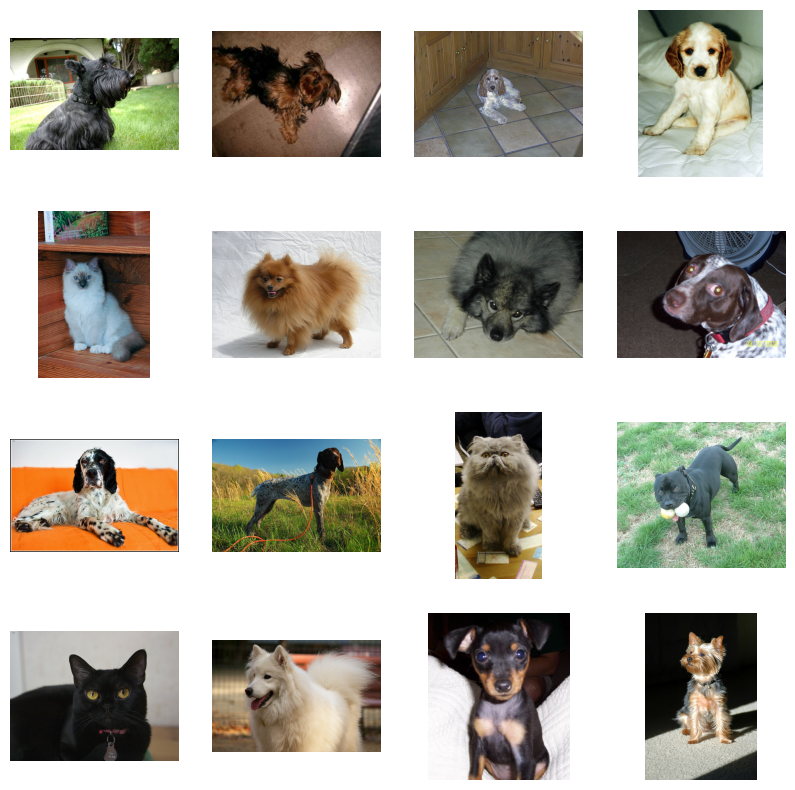

In [17]:
rand_path = random.sample(img_path, 16)

fig, ax = plt.subplots(nrows = 4, ncols = 4, figsize = (10, 10))

r = c = 0
for img_load in rand_path:      
    img = cv2.cvtColor(cv2.imread(img_load), cv2.COLOR_BGR2RGB)
    ax[r, c].imshow(img)
    ax[r, c].axis('off')
    c += 1
    if c >= 4:
        r += 1
        c  = 0


# Extract data from xml

In [18]:
lab_load = lab_path[0]
print(lab_load)

with open(lab_load, 'r') as f:
    data = f.read()
    
bs_data = BeautifulSoup(data, 'xml')
bs_objs = bs_data.find_all('object')

for bs_obj in bs_objs:
    bs_cls = bs_obj.find('name').text
    bs_box = bs_obj.find('bndbox')
    x0 = bs_box.find('xmin').text
    x1 = bs_box.find('xmax').text
    y0 = bs_box.find('ymin').text
    y1 = bs_box.find('ymax').text

    box = np.array([x0, y0, x1, y1]).astype(np.int32)
    print(bs_cls, box)


cat_and_dog_det_data/annotations/Cats_Test0.xml
cat [ 83  29 197 142]


# Visualise bounding box

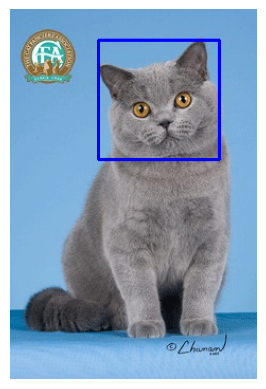

In [19]:
img_load = img_path[0]
img = cv2.cvtColor(cv2.imread(img_load), cv2.COLOR_BGR2RGB)

img = visualise_boxes(img, np.expand_dims(box, 0))
plt.imshow(img)
plt.axis('off')
plt.show()
